# ---------------------------------EVALUATION PROJECT--------------------------------------------

NAME - RITVIK BHARDWAJ


BATCH - DS2303



# Baseball Case Study 

 Major League Baseball (MLB) is the highest level of professional baseball in the world and accounts for some of the most popular international sporting events.Major League Baseball is a professional baseball league, where teams pay players to play baseball.

This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins.

   ## Input features:
    Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts, Stolen Bases, Runs Allowed, Earned Runs, Earned Run Average (ERA), Shutouts, Saves, and Errors

   ## Output: 
   #### Number of predicted wins (W)

# Problem Definition: 
 The aim of this study is to predict the outcomes of MLB matches during the 2015 season, and this is achieved using machine learning methods.

# Import Neccessary Libraries

In [126]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Data Collection and Data Information

In [127]:
df = pd.read_csv(r"C:\Users\RITVIK BHARDWAJ\Downloads\baseball.csv")
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


# Exploratory Data Analysis(EDA)

In [128]:
# Checking the dimensions
df.shape

(30, 17)

#### This dataset contains 30 rows and 17 columns including the target variable.

In [129]:
# checking the columns 
df.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

In [130]:
# Checking the datatypes of all the columns
df.dtypes

W        int64
R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object

   1. We can observe that all columns are of int datatype except ERA(Earned Run Average) column which is of float datatype.
   2. There is no object datatype, so no categorical data and no need to encode data.

In [131]:
# For getting the overview of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


#### We can observe that there are no null values present in the data set.

In [132]:
# checking the unique values of all the columns of this datatype
df.nunique()

W      24
R      28
AB     29
H      29
2B     22
3B     23
HR     27
BB     29
SO     29
SB     27
RA     30
ER     30
ERA    30
CG      9
SHO    12
SV     20
E      21
dtype: int64

In [133]:
# checking the null values in the dataframe
df.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

#### As we have already seen above, dataset has no null values.

<AxesSubplot:>

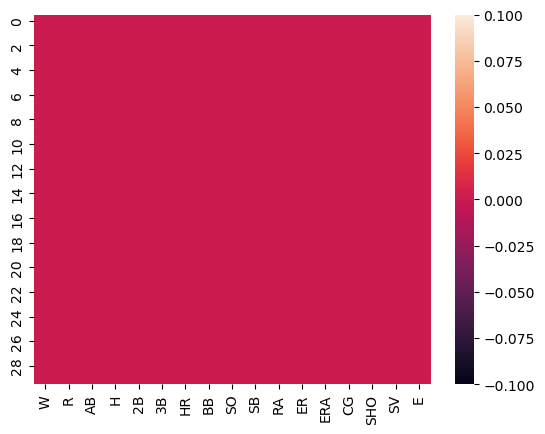

In [134]:
# Visualizing null values using Heatmap
sns.heatmap(df.isnull())

#### Visualization confirms that no null values are present in this dataset.

In [135]:
# Checking the uniqueness of the target column
df['W'].unique()

array([ 95,  83,  81,  76,  74,  93,  87,  80,  78,  88,  86,  85,  68,
       100,  98,  97,  64,  90,  71,  67,  63,  92,  84,  79], dtype=int64)

In [136]:
# List of values in the target variable
df['W'].value_counts()

68     3
81     2
76     2
74     2
83     2
98     1
84     1
92     1
63     1
67     1
71     1
90     1
64     1
97     1
95     1
100    1
85     1
86     1
88     1
78     1
80     1
87     1
93     1
79     1
Name: W, dtype: int64

In [137]:
# Check whether the dataset contains any space
df.loc[df['W']==" "]

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E


#### We can see there is no space in the dataset

In [138]:
#Check for duplicate data
df.duplicated().sum()

0

#### There is no duplicate value in dataset

In [139]:
#Checking the Statisticalo Summary of the dataset
df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


<AxesSubplot:>

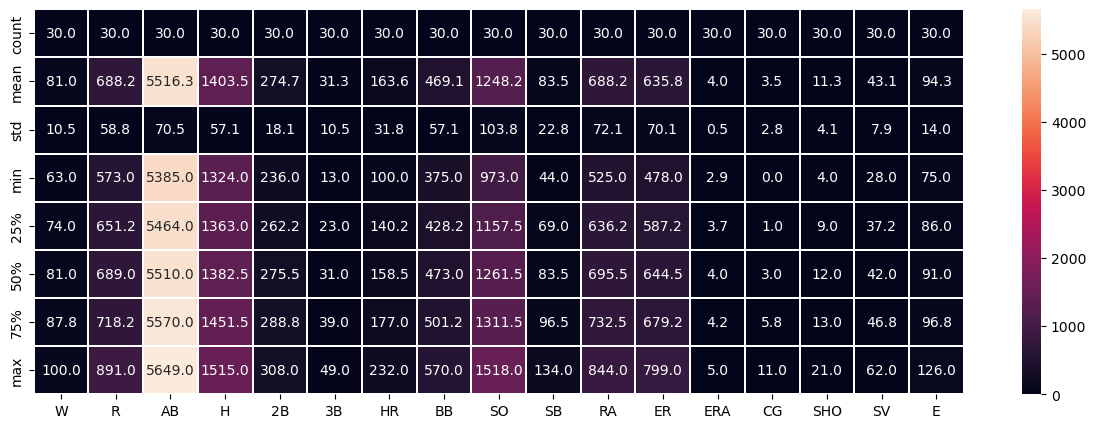

In [140]:
# Visualizing the statistics of the columns using heatmap.
plt.figure(figsize=(15,5))
sns.heatmap(df.describe(),linewidths = 0.1,fmt='0.1f',annot = True)

#### This provides the statistical description of the data set. The summary of the dataset seems perfect as there are no negative / invalid values present. From the above observation, we can conclude that-

   1. The counts of all the columns are the same. So there are no null values in the dataset.
   2. The mean is bit less than the median(50%) in the Target column, which means it is skewed to the left.
   3. The mean of the target column is 80.96 and the maximum(Max) is 100, it means that the team won more matches.
   4. The Runs('R') column also has the median more than the mean, it means it is also left skewed.
   5. Same differences can also be seen in the columns ['2B','BB','SO','RA','ER','ERA','SHO'].So these columns are also negatively skewed.
   6. But in Columns '3B' and 'SB', the mean and the median is the same,which means the data is normal or symmetrical. Also the feature CG has mean bit higher t6han the median so its almost normal.
   7. Also there is a huge differences in max and 70% percentile(3rd quantile).
#### The above all observations clears that the outliers present in many of these columns.

# EDA Concluding Remarks

   1. This is a Regression Problem since the Target variable / Label column ("W") has Continuous type of Data.
   2. No need to encode the data.
   3. Missing data and duplicate data not found.
   4. Check for Outliers and Skewness.
   
#### Till now, everything seems fine, let's proceed and visualize our data with Univariate, Bivariate and Multivariate Analysis.
   

# Data Visualization

### Univariate Analysis

<AxesSubplot:xlabel='W', ylabel='Count'>

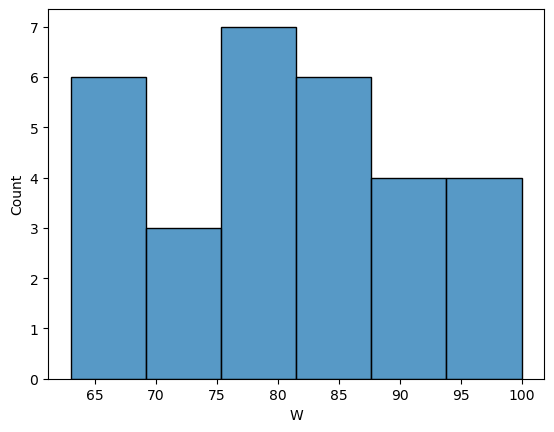

In [141]:
# Visualizing the Histogram of the Target Variable
sns.histplot(df['W'])

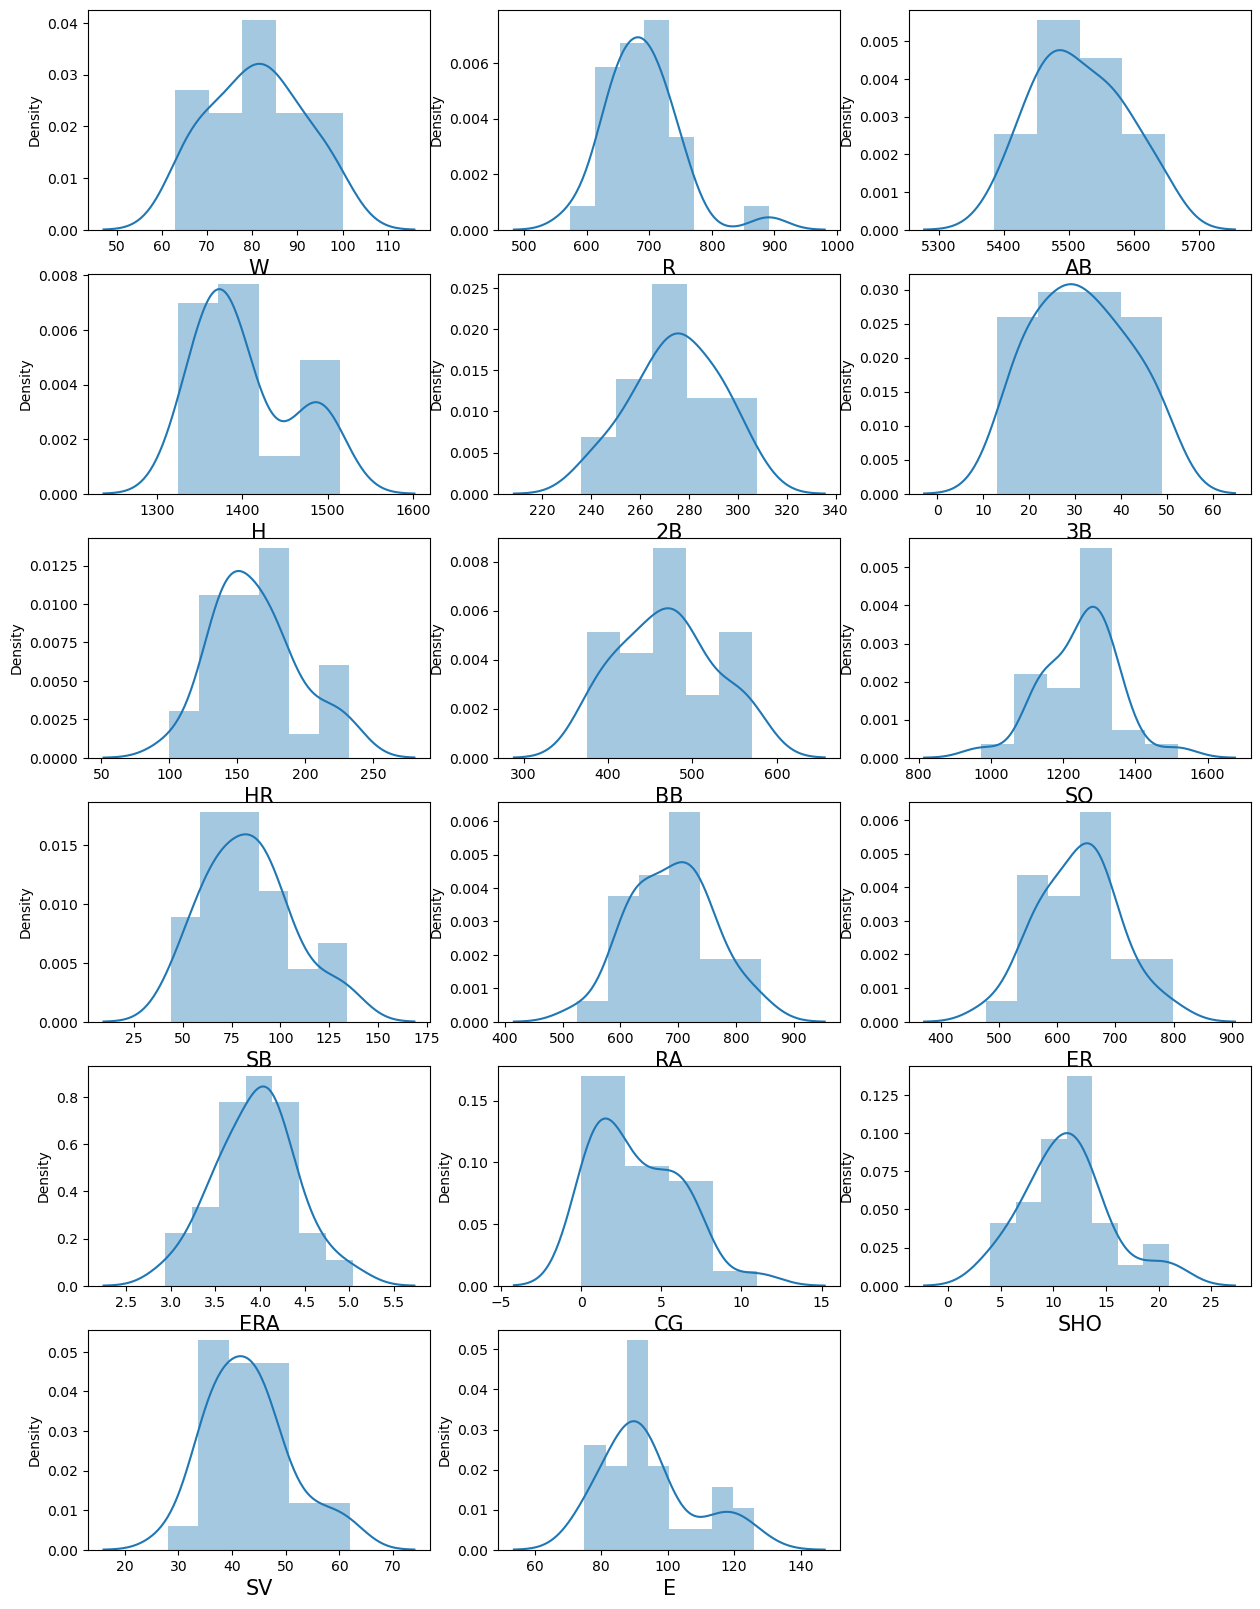

In [142]:
# check how the data is distributated in each coloumn
plt.figure(figsize=(15,20))
plotnumber = 1
for coloumn in df:
    if plotnumber<=18:
        ax = plt.subplot(6,3,plotnumber)
        sns.distplot(df[coloumn])
        plt.xlabel(coloumn,fontsize =15)
    plotnumber+=1
plt.show()

#### From the distribution graphs above, it can be seen that most of the columns are normally distributed and few of them have skewness.
   1. The target column ['W'] is normally distributed and there is no skewness present.
   2. The column 'R'(Runs) is not normal, it is skewed to the left. The run rate lies between 570-890.
   3. The same differences can be seen in the columns 'BB','SO','RA','ERA'and'SHO'. Eventhough they looks normal but has skewness.
   4. The column('AB') looks normally distributed and has no skewness. The value of AB mostly lies between 5300-5650.
   5. The column 'H','HR','SV','E' are not normal and the they are skewed to the right.
   6. The doubles rate('2B') is between 230-300 and it looks normally distributed but bit skewness is present.
   7. The distribution of the data present in the columns '3B','SB','Cg', and 'ER' is normal and has no skewness.

### Bivariate Analysis

Text(0, 0.5, 'Error')

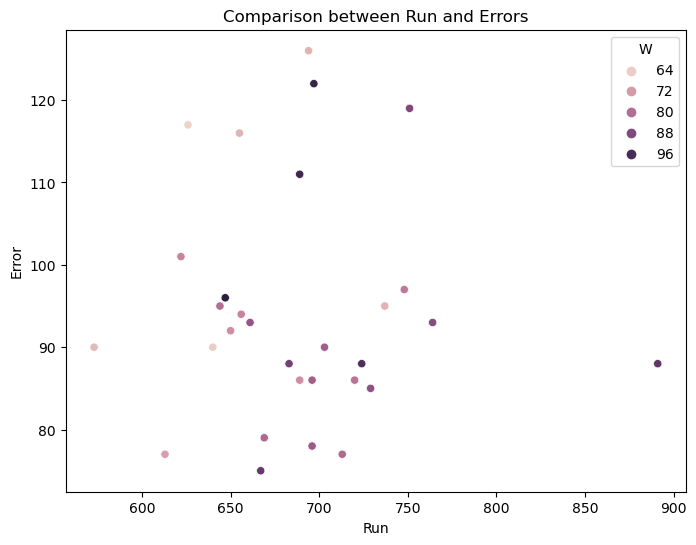

In [143]:
# Checking the relation between two variables.
plt.figure(figsize=(8,6))
plt.title("Comparison between Run and Errors")
sns.scatterplot(df['R'],df['E'], hue = df['W'])
plt.xlabel("Run")
plt.ylabel("Error")

#### The scatterplot provides the relation between the Runs and Errors with respect to Wins. There is no linear relationship between these columns. We can deduce that there is no correlation. The runs between 650-730 with the error upto 95 have more wins. Also we can see the presence of outliers.

Text(0, 0.5, 'Hits')

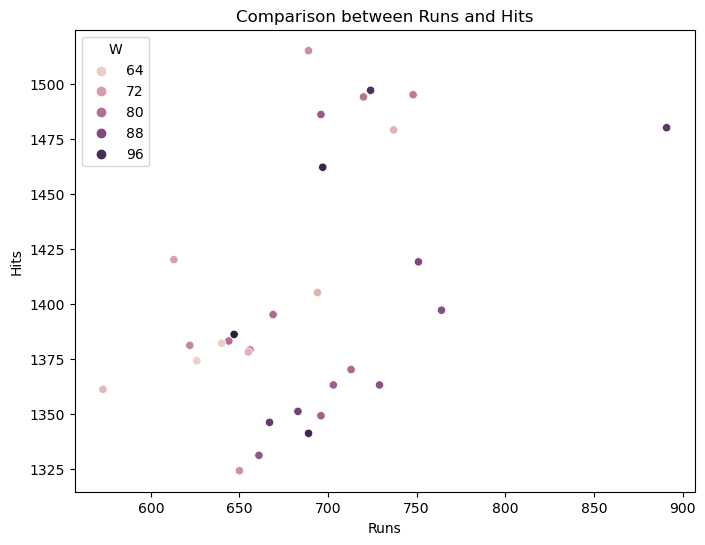

In [144]:
# Checking the relation between two variables
plt.figure(figsize=[8,6])
plt.title('Comparison between Runs and Hits')
sns.scatterplot(df['R'],df['H'],hue=df['W'])
plt.xlabel('Runs')
plt.ylabel("Hits")

#### We can deduce that there is no linearity between the columns. The run rate is also high in the range of 650 to 750 with the hit rate renges 1500, which means that the team wins are more in these ranges.

Text(0, 0.5, 'Hits')

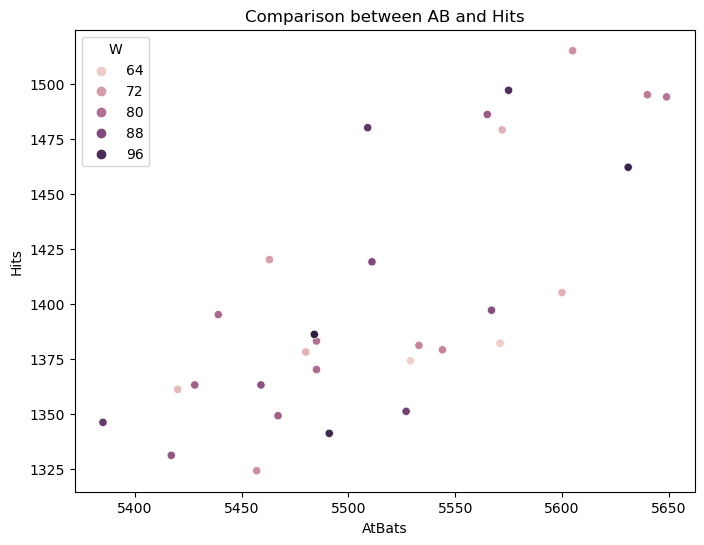

In [145]:
# Checking relation between two variable 
plt.figure(figsize=([8,6]))
plt.title("Comparison between AB and Hits")
sns.scatterplot(df['AB'],df['H'],hue=df['W'])
plt.xlabel('AtBats')
plt.ylabel("Hits")

#### We can see a  weak linear relationship between features. As the AB rate increases with the hit rate, the team's wins also increase.

Text(0, 0.5, 'Earneds Runs Average')

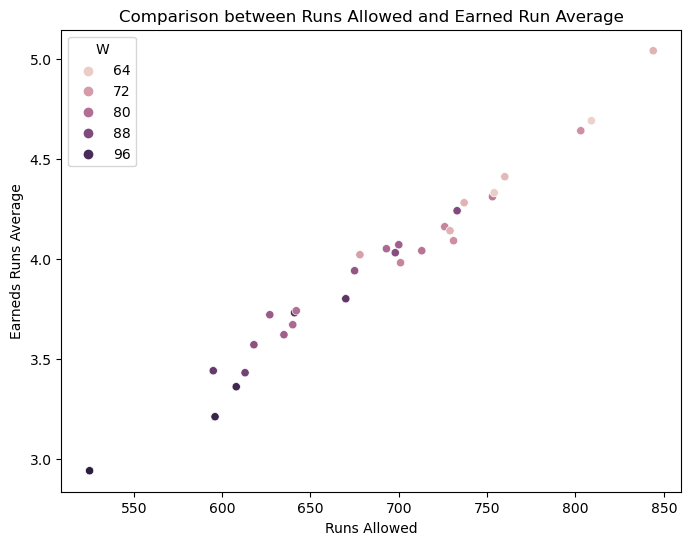

In [146]:
# checking the realtionship between two variables
plt.figure(figsize=[8,6])
plt.title('Comparison between Runs Allowed and Earned Run Average')
sns.scatterplot(df['RA'],df['ERA'],hue=df['W'])
plt.xlabel("Runs Allowed")
plt.ylabel("Earneds Runs Average")

#### In the above plot, we can see that there is a strong relationship between these columns. As the "Runs Allowed" increases, "ERA" also increases which leads to the increase in winning rates.

Text(0, 0.5, 'Wins')

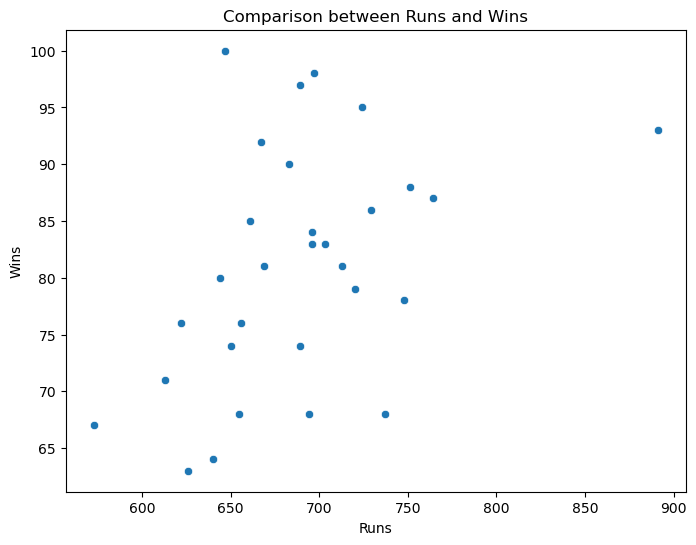

In [147]:
# checking the realtionship be3tween two variables
plt.figure(figsize=[8,6])
plt.title('Comparison between Runs and Wins')
sns.scatterplot(df['R'],df['W'])
plt.xlabel("Runs")
plt.ylabel("Wins")

#### We can see a weak linear relationship, as run rate increases,rate of win also increases. 

Text(0, 0.5, 'Wins')

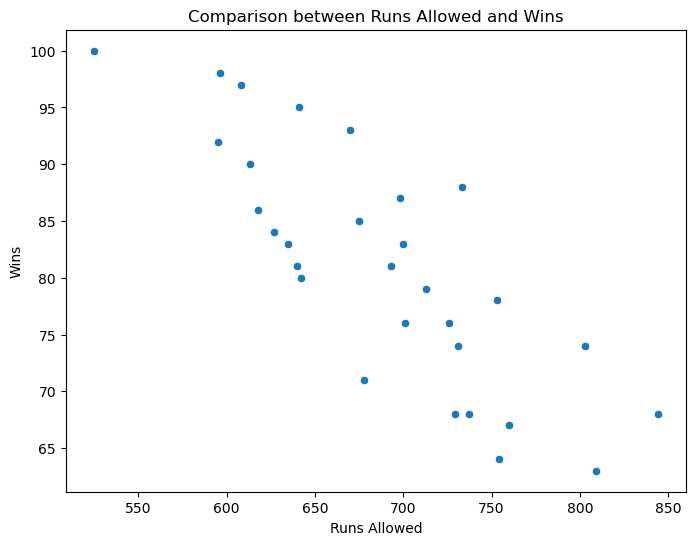

In [148]:
# checking the realtionship be3tween two variables
plt.figure(figsize=[8,6])
plt.title('Comparison between Runs Allowed and Wins')
sns.scatterplot(df['RA'],df['W'])
plt.xlabel("Runs Allowed")
plt.ylabel("Wins")

#### Here, we can observe that there is a negative linear relationship between Runs Allowed and Wins. Since the data falls from left to right, it means that the target column is highly correlated with the "RA" column.

Text(0, 0.5, 'Wins')

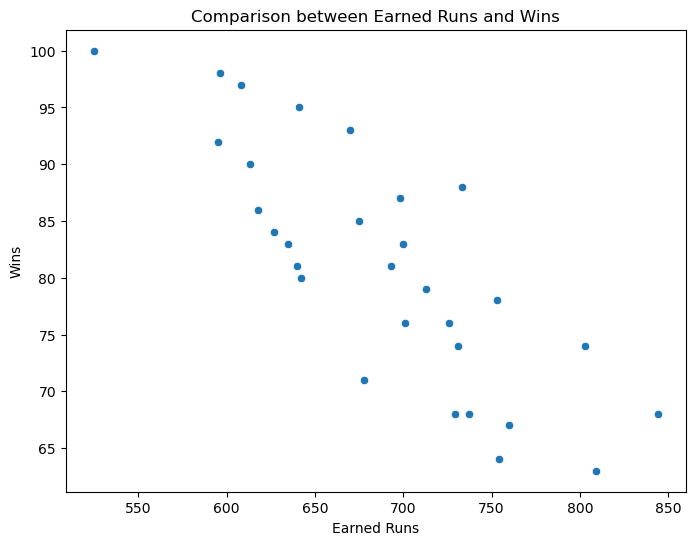

In [149]:
# checking the realtionship be3tween two variables
plt.figure(figsize=[8,6])
plt.title('Comparison between Earned Runs and Wins')
sns.scatterplot(df['RA'],df['W'])
plt.xlabel("Earned Runs")
plt.ylabel("Wins")

#### Same observation with the earned runs too, is also forming an inverse linear relationship with the target. As the ER rate decreases, the win rate also decreases.

Text(0, 0.5, 'Wins')

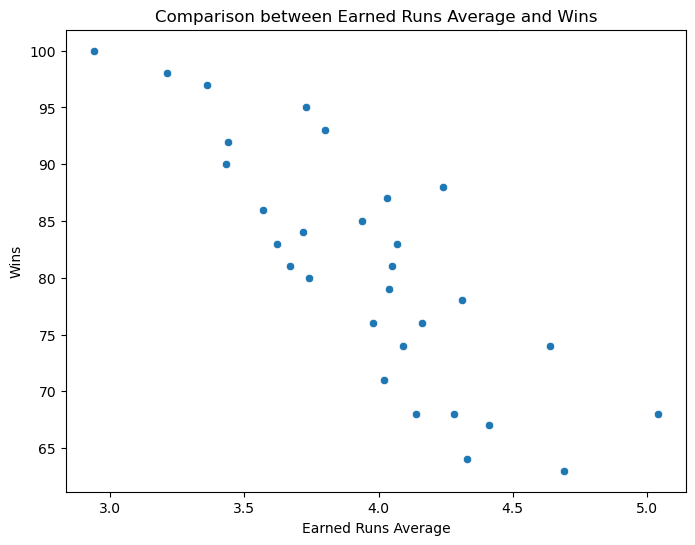

In [150]:
#checking the realtionship be3tween two variables
plt.figure(figsize=[8,6])
plt.title('Comparison between Earned Runs Average and Wins')
sns.scatterplot(df['ERA'],df['W'])
plt.xlabel("Earned Runs Average")
plt.ylabel("Wins")

##### Even ERA i.e Earned Runs Average also has a negative linear relationship with the label, stating that this function is highly correlated with the label.

Text(0, 0.5, 'Earned Runs Average')

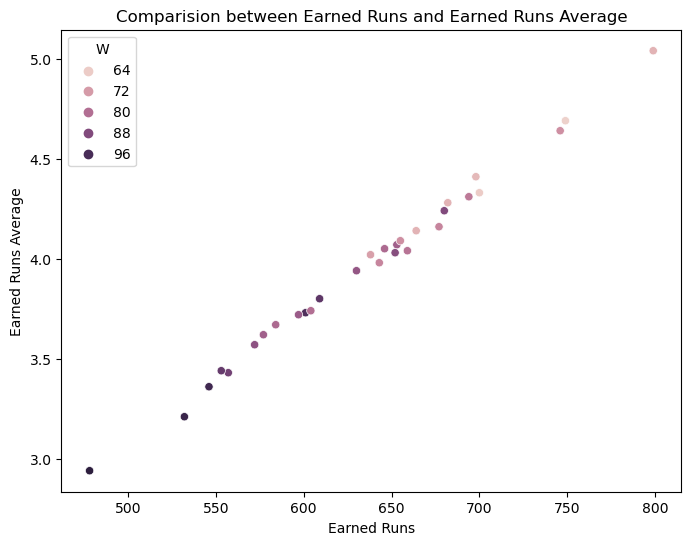

In [151]:
# Checking the relation between two variables
plt.figure(figsize=[8,6])
plt.title('Comparision between Earned Runs and Earned Runs Average')
sns.scatterplot(df['ER'],df['ERA'],hue=df["W"]);
plt.xlabel("Earned Runs")
plt.ylabel("Earned Runs Average")

#### We can see there is a strong linear relationship between the features. As ER increases, ERA also increases.

Text(0, 0.5, 'Wins')

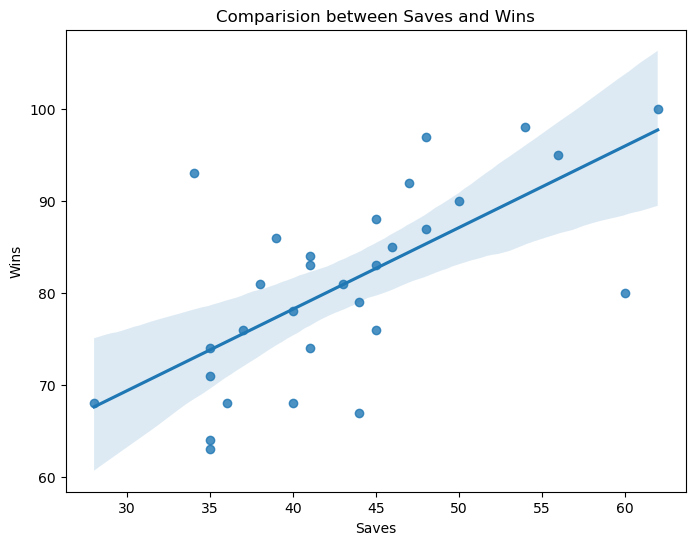

In [152]:
# Checking the relation between two variables
plt.figure(figsize=[8,6])
plt.title('Comparision between Saves and Wins')
sns.regplot(df['SV'],df['W'])
plt.xlabel("Saves")
plt.ylabel("Wins")

#### Here, we can say  that there is a positive linear relationship between the feature Saves and label Wins

Text(0, 0.5, 'Wins')

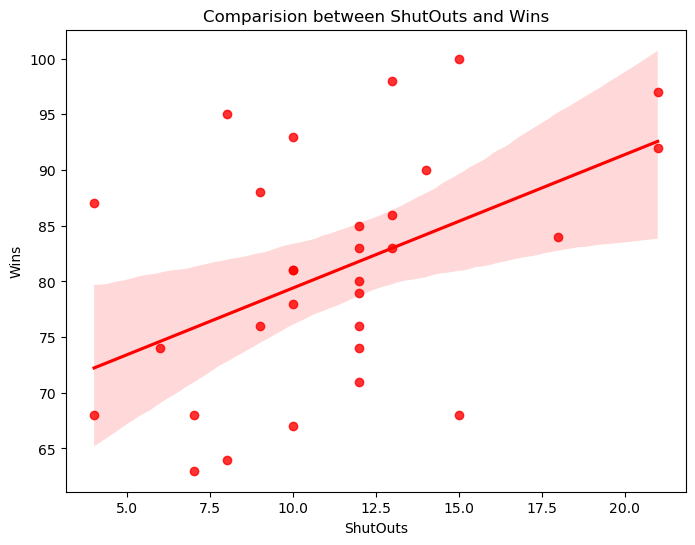

In [153]:
# Checking the relation between two variables
plt.figure(figsize=[8,6])
plt.title('Comparision between ShutOuts and Wins')
sns.regplot(df['SHO'],df['W'],color="r");
plt.xlabel("ShutOuts")
plt.ylabel("Wins")

#### There is not much linearity between the feature and the label. In some of the datapoints, we can see that whenever shoutouts is high, there is a chance of win.

Text(0, 0.5, 'Wins')

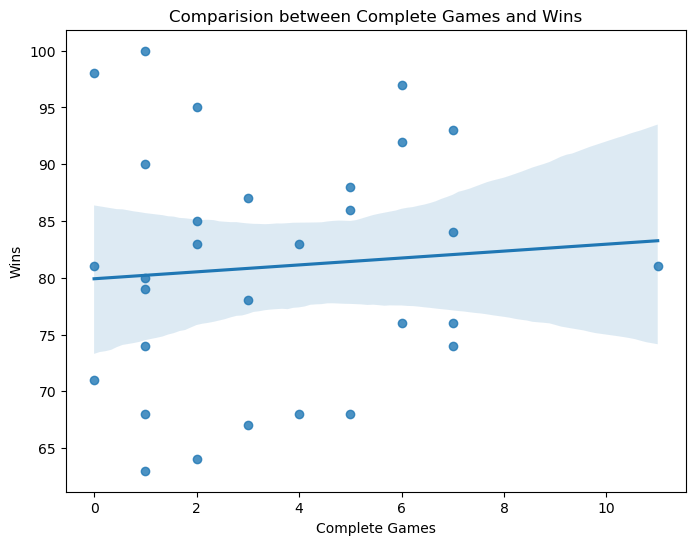

In [154]:
# Checking the relation between two variables
plt.figure(figsize=[8,6])
plt.title('Comparision between Complete Games and Wins')
sns.regplot(df['CG'],df['W']);
plt.xlabel("Complete Games")
plt.ylabel("Wins")

#### Here, also the data points are scattered and there is no significant linear relationship between CG and Wins

Text(0, 0.5, 'Wins')

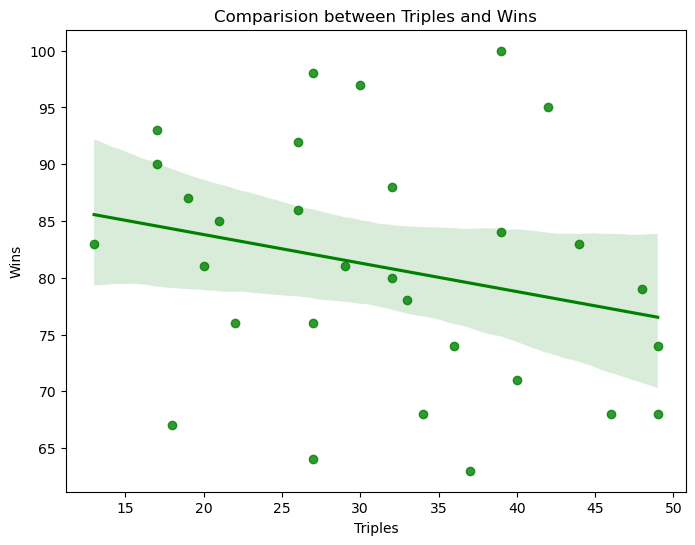

In [30]:
# Checking the relation between two variables
plt.figure(figsize=[8,6])
plt.title('Comparision between Triples and Wins')
sns.regplot(df['3B'],df['W'],color="g");
plt.xlabel("Triples")
plt.ylabel("Wins")

#### The feature 3B(Triples) have a negative linear relationship with the target column

Text(0, 0.5, 'Wins')

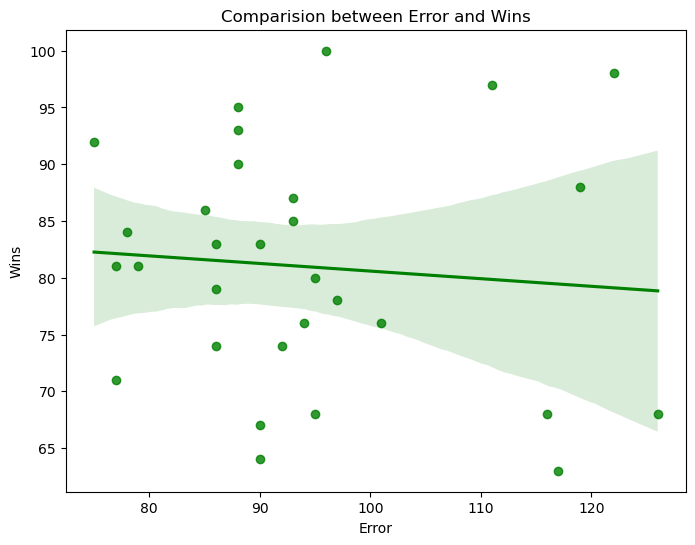

In [119]:
# Checking the relation between two variables
plt.figure(figsize=[8,6])
plt.title('Comparision between Error and Wins')
sns.regplot(df['E'],df['W'],color="g");
plt.xlabel("Error")
plt.ylabel("Wins")

#### As the data is scattered, there is no linear relationship exist between these columns

### Multivariate Analysis

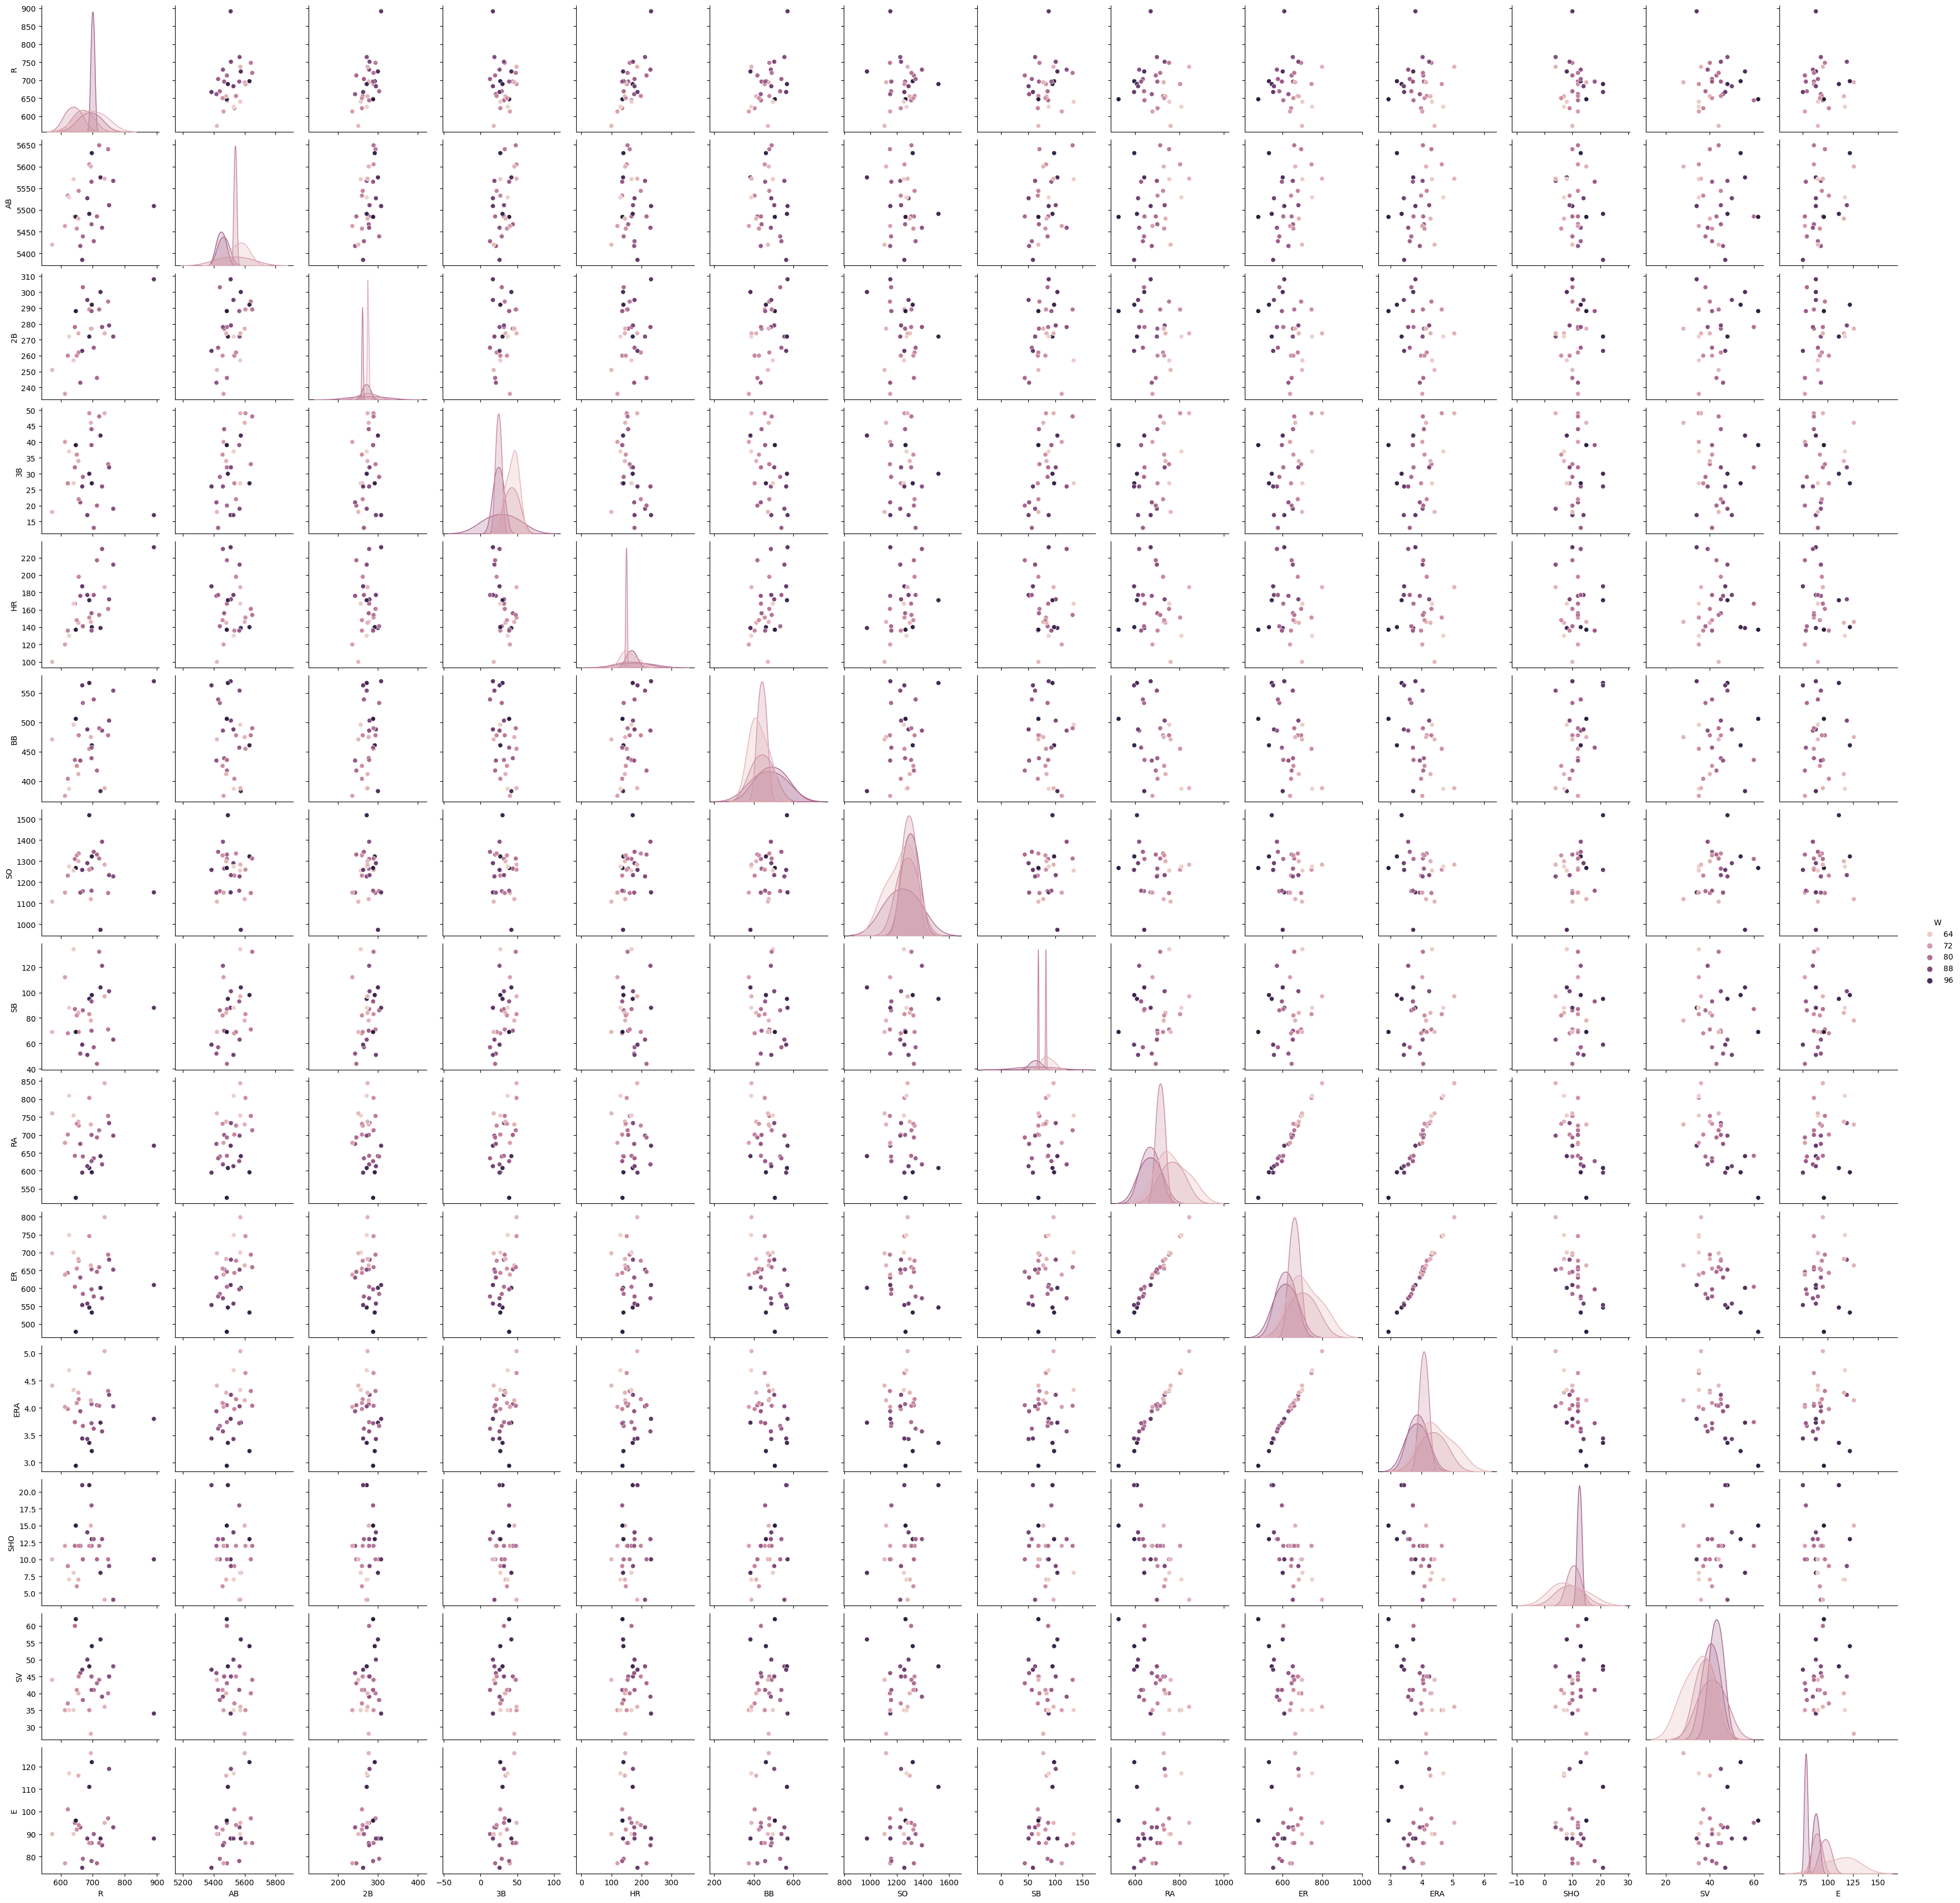

In [74]:
#checking the pairwise relation in the dataset

sns.pairplot(df,hue='W')

#### This pairplot gives the pairwise relationship between the columns which is plotted on the basis of the target variable'W'. We can also observe relationship between all the featues and the labels.

### Correlation between the target variable and independent variable

In [75]:
# checking the correlation of features and labels
df.corr()

,W,R,AB,2B,3B,HR,BB,SO,SB,RA,ER,ERA,SHO,SV,E
W,1.000000,0.430751,-0.087947,0.427797,-0.251118,0.307407,0.484342,0.111850,-0.157234,-0.812952,-0.809435,-0.819600,0.471805,0.666530,-0.089485
R,0.430751,1.000000,0.319464,0.560084,-0.070072,0.671283,0.402452,-0.054726,0.081367,-0.041623,-0.041245,-0.049281,-0.103274,-0.096380,-0.023262
AB,-0.087947,0.319464,1.000000,0.453370,0.435422,-0.066983,-0.136414,-0.106022,0.372618,0.316010,0.309686,0.255551,-0.197321,-0.106367,0.316743
2B,0.427797,0.560084,0.453370,1.000000,0.220490,0.056292,0.302700,-0.150752,0.195027,-0.218160,-0.235531,-0.254854,0.057998,0.171576,0.105754
3B,-0.251118,-0.070072,0.435422,0.220490,1.000000,-0.430915,-0.454949,-0.141196,0.457437,0.314125,0.340225,0.330951,-0.041396,-0.142370,0.126678
HR,0.307407,0.671283,-0.066983,0.056292,-0.430915,1.000000,0.425691,0.359923,-0.136567,-0.103903,-0.085922,-0.090917,-0.019119,-0.028540,-0.207597
BB,0.484342,0.402452,-0.136414,0.302700,-0.454949,0.425691,1.000000,0.233652,-0.098347,-0.416445,-0.452663,-0.459832,0.426004,0.099445,-0.075685
SO,0.111850,-0.054726,-0.106022,-0.150752,-0.141196,0.359923,0.233652,1.000000,0.030968,-0.129745,-0.161612,-0.180368,0.237721,0.126297,0.155133
SB,-0.157234,0.081367,0.372618,0.195027,0.457437,-0.136567,-0.098347,0.030968,1.000000,0.132290,0.143068,0.126063,-0.106563,-0.183418,0.079149
RA,-0.812952,-0.041623,0.316010,-0.218160,0.314125,-0.103903,-0.416445,-0.129745,0.132290,1.000000,0.991018,0.986674,-0.636862,-0.616224,0.198996


#### This gives the corelation between the dependent and independent variables, but  visualization of correlation will look more nice, so let's visualize it with the help of Heat map.

<AxesSubplot:>

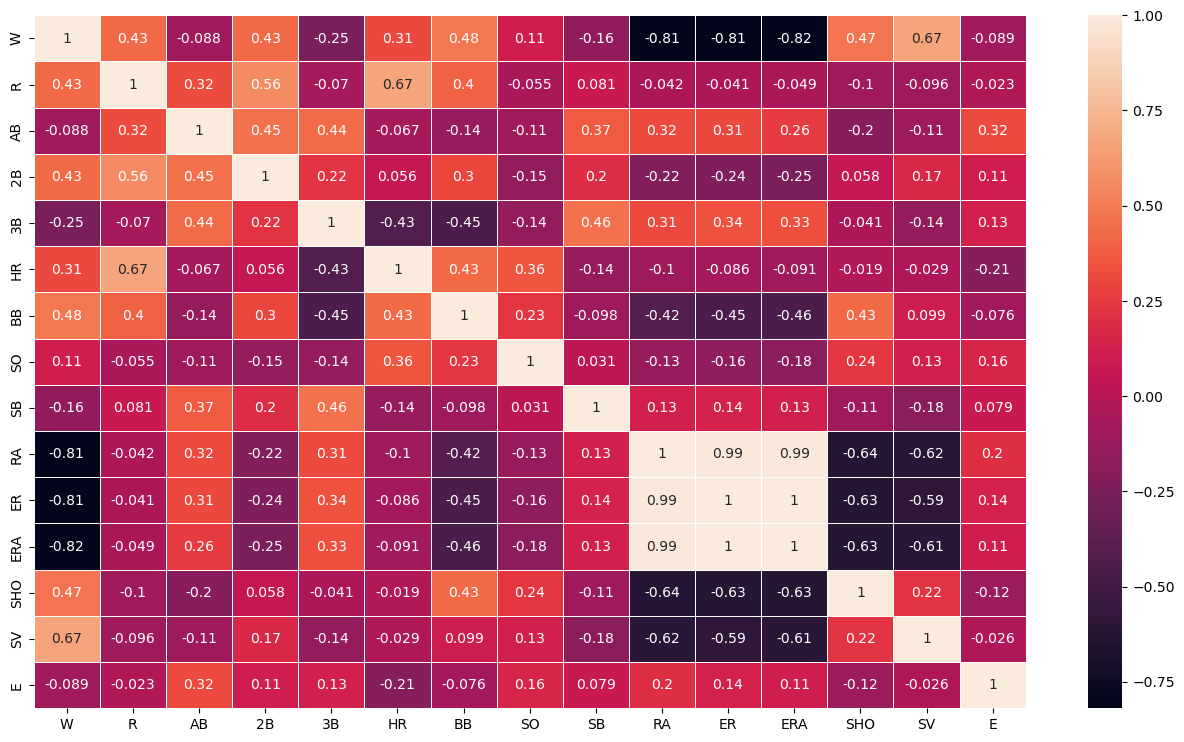

In [76]:
# Heat Map
plt.figure(figsize=(16,9))
sns.heatmap(df.corr(),linewidths=0.5,annot = True)

#### This heat map contains both negative and positive correlations.

   1. The target 'W' is positively correlated with thew features 'SV', 'SHO','BB','HR','2B','R','SO'.
   2. The target 'W' is highly negatively correlated with the features 'ERA','ER', and 'RA'.
   3. The target 'W' is also negatively correlated with the features 'E','SB','3B' and 'AB'.
   4. Apart from this labels and features correlations, we can also observe that the features 'ERA','ER',nad'RA' are highly positively correlated with each other which can create multicolinearity problem.
   
#### Positively Correlated Colums:

  1. SV(Saves)
  2. SHO(Shoutouts)
  3. BB(Walks)
  4. 2B(Doubles)
  5. R(Runs)
  6. HR(Homeruns)
  7. CG(Complete Games)
  8. SO(Strikeouts)
  
#### Negatively Correlated Columns :

 1. AB(At Bats)
 2. 3B(Triples)
 3. SB(Stolen bases)
 4. RA(Runs allowed)
 5. ER(Earned Runs)
 6. ERA(Earned Run Average)
 7. H(Hits)
 8. E(Error)

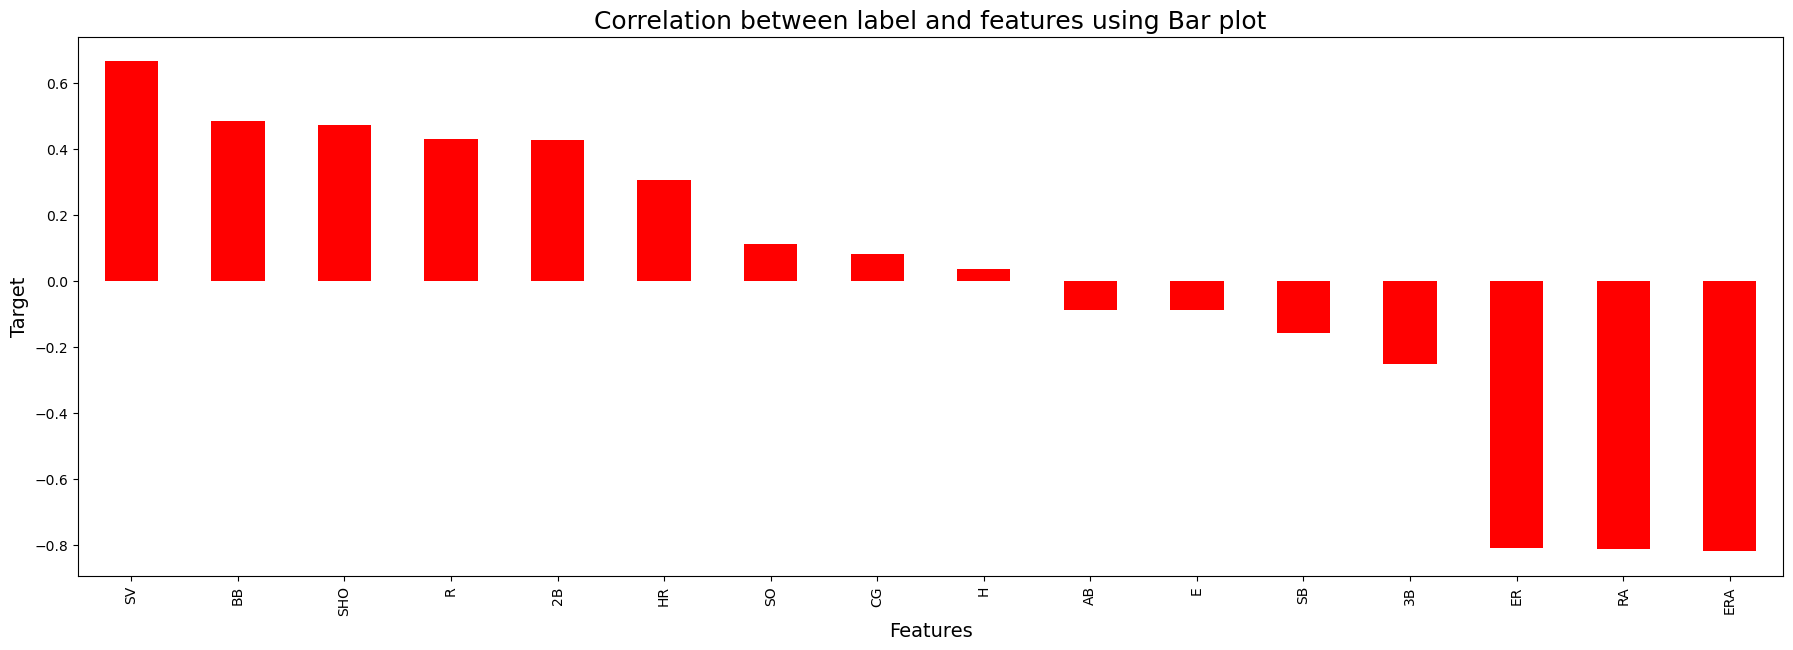

In [155]:
# Visualizing Correlation between label and features using Heatmap

plt.figure(figsize=(22,7))
df.corr()['W'].sort_values(ascending=False).drop(['W']).plot(kind='bar',color='r')
plt.xlabel('Features',fontsize=14)
plt.ylabel('Target',fontsize=14)
plt.title('Correlation between label and features using Bar plot',fontsize=18)
plt.show()

In [82]:
# new dimensions
df.shape

(30, 15)

# Outliers Detection

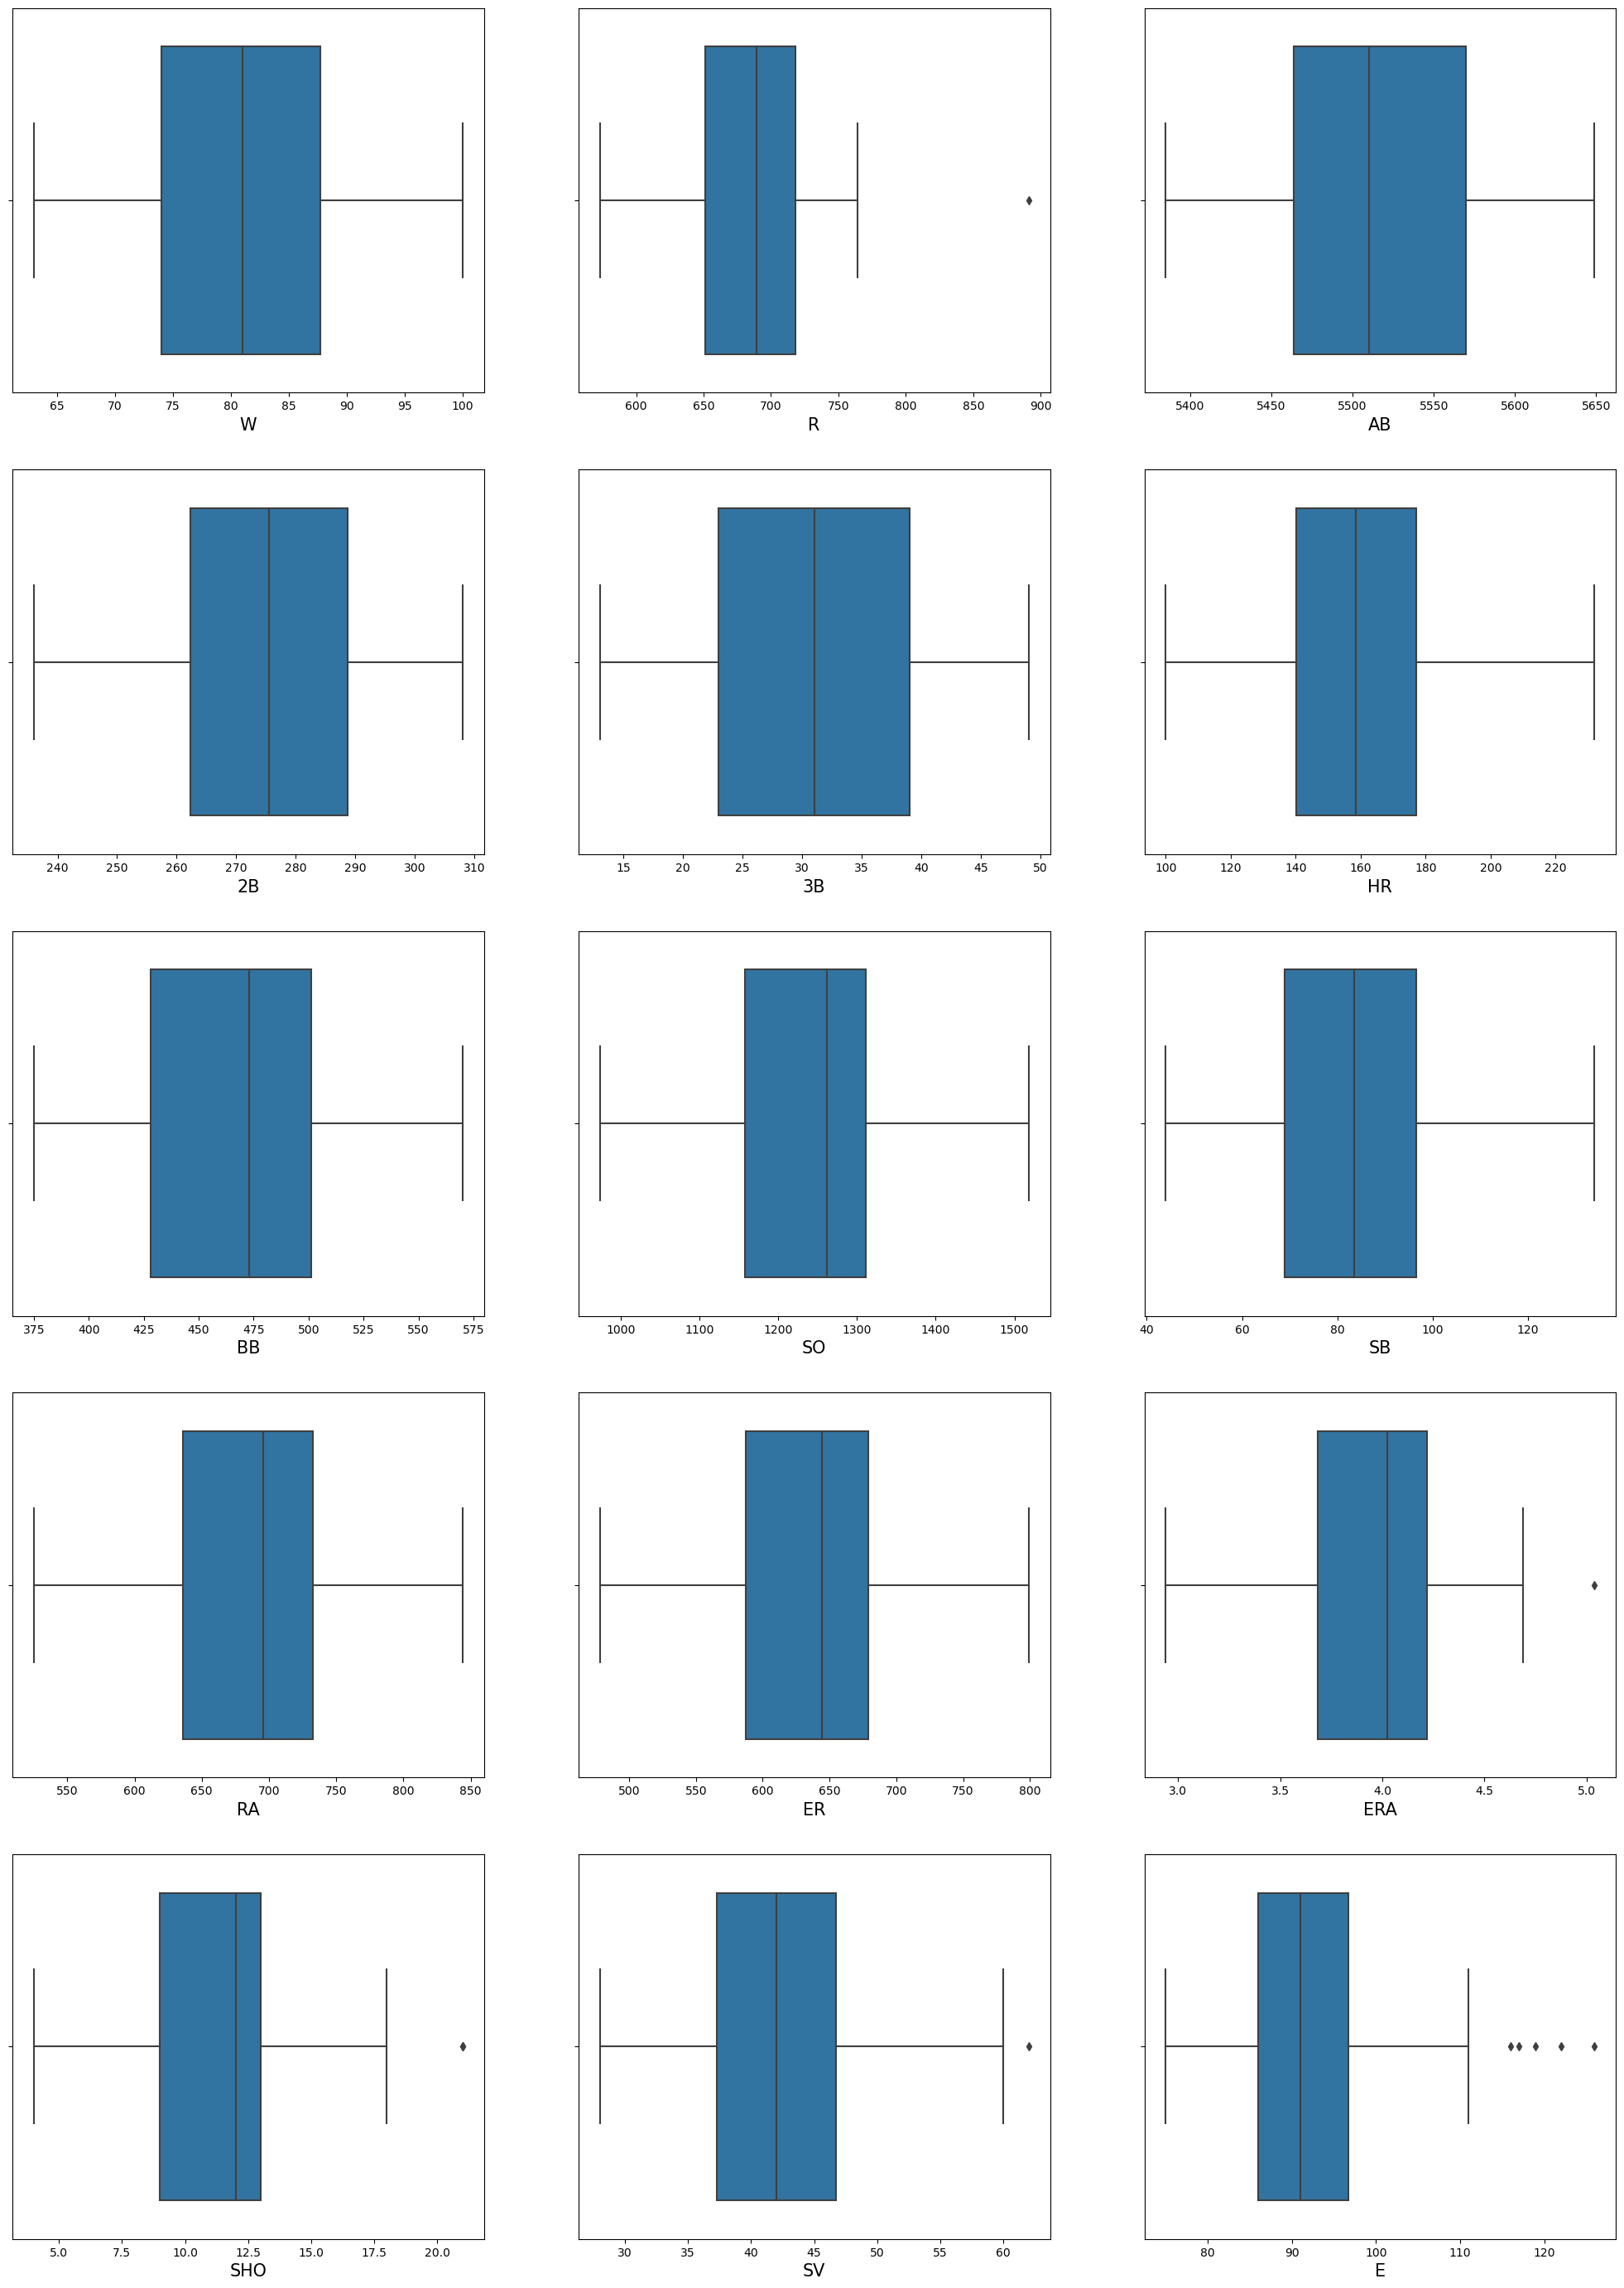

In [83]:
plt.figure(figsize=(25,35))
plotnumber = 1

for column in df:
    if plotnumber<=15:
        ax = plt.subplot(5,3,plotnumber)
        sns.boxplot(df[column])
        plt.xlabel(column,fontsize = 15)
    plotnumber+=1
plt.show()

#### We can observe that the columns 'R','ERA','SHO','SV' and 'E' have outliers. So, removing the outliers using zscore and IQR techniques before building the model.

### Removing Outliers using Zscore:

In [84]:
features = df[['R','ERA','SHO','SV','E']]

from scipy.stats import zscore
z=np.abs(zscore(features))
z

,R,ERA,SHO,SV,E
0,0.619078,0.506955,0.814629,1.671607,0.461470
1,0.134432,0.254598,0.172800,0.249879,0.607197
2,0.332906,0.641347,0.320914,0.654856,1.117242
3,1.146419,0.053010,0.567771,0.784104,0.485758
4,0.013270,1.531318,0.172800,1.042600,0.607197
5,3.509647,0.350165,0.320914,1.171848,0.461470
6,1.311430,0.165003,1.802057,0.637623,0.097152
7,0.428681,0.209800,0.320914,0.008617,1.262970
8,0.765626,0.484557,0.172800,2.188598,0.048576
9,1.034489,0.792164,0.320914,0.396360,0.194303


In [85]:
# creating new dataframe
new_df = df[(z<3).all(axis=1)]
new_df

,W,R,AB,2B,3B,HR,BB,SO,SB,RA,ER,ERA,SHO,SV,E
0,95,724,5575,300,42,139,383,973,104,641,601,3.73,8,56,88
1,83,696,5467,277,44,156,439,1264,70,700,653,4.07,12,45,86
2,81,669,5439,303,29,141,533,1157,86,640,584,3.67,10,38,79
3,76,622,5533,260,27,136,404,1231,68,701,643,3.98,9,37,101
4,74,689,5605,289,49,151,455,1259,83,803,746,4.64,12,35,86
6,87,764,5567,272,19,212,554,1227,63,698,652,4.03,4,48,93
7,81,713,5485,246,20,217,418,1331,44,693,646,4.05,10,43,77
8,80,644,5485,278,32,167,436,1310,87,642,604,3.74,12,60,95
9,78,748,5640,294,33,161,478,1148,71,753,694,4.31,10,40,97
10,88,751,5511,279,32,172,503,1233,101,733,680,4.24,9,45,119


#### New dataframe after removing outliers.

In [86]:
print(df.shape) #previous dimension
print(new_df.shape) # new dimension

(30, 15)
(29, 15)


### Data loss percent

In [87]:
# checking data loss prercent
data_loss = (30-29)/30*100
data_loss

3.3333333333333335

#### Using zscore the data loss is not more. 

## Skewness Detection

In [88]:
#checking the skewness
new_df.skew()

W      0.119013
R     -0.215364
AB     0.169573
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
RA     0.018155
ER     0.018461
ERA    0.016693
SHO    0.526943
SV     0.627480
E      0.840271
dtype: float64

#### The skewness is present in the columns 'SHO','SV' and'E'.

## Removing Skewness using yeo-johnson method

In [89]:
skewed_features = ['SHO','SV','E']

In [90]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')

In [91]:
new_df[skewed_features] = scaler.fit_transform(new_df[skewed_features].values)
new_df[skewed_features].head()

,SHO,SV,E
0,-0.787002,1.532753,-0.348265
1,0.236737,0.312020,-0.540820
2,-0.252844,-0.664137,-1.326125
3,-0.513555,-0.820689,0.650818
4,0.236737,-1.149165,-0.540820


In [92]:
# Checking the skewness after applying yeo-johnson method.
new_df.skew()

W      0.119013
R     -0.215364
AB     0.169573
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
RA     0.018155
ER     0.018461
ERA    0.016693
SHO    0.000529
SV    -0.000925
E      0.065585
dtype: float64

#### Skewness has been removed. Now, lets visualize it by using distplot.

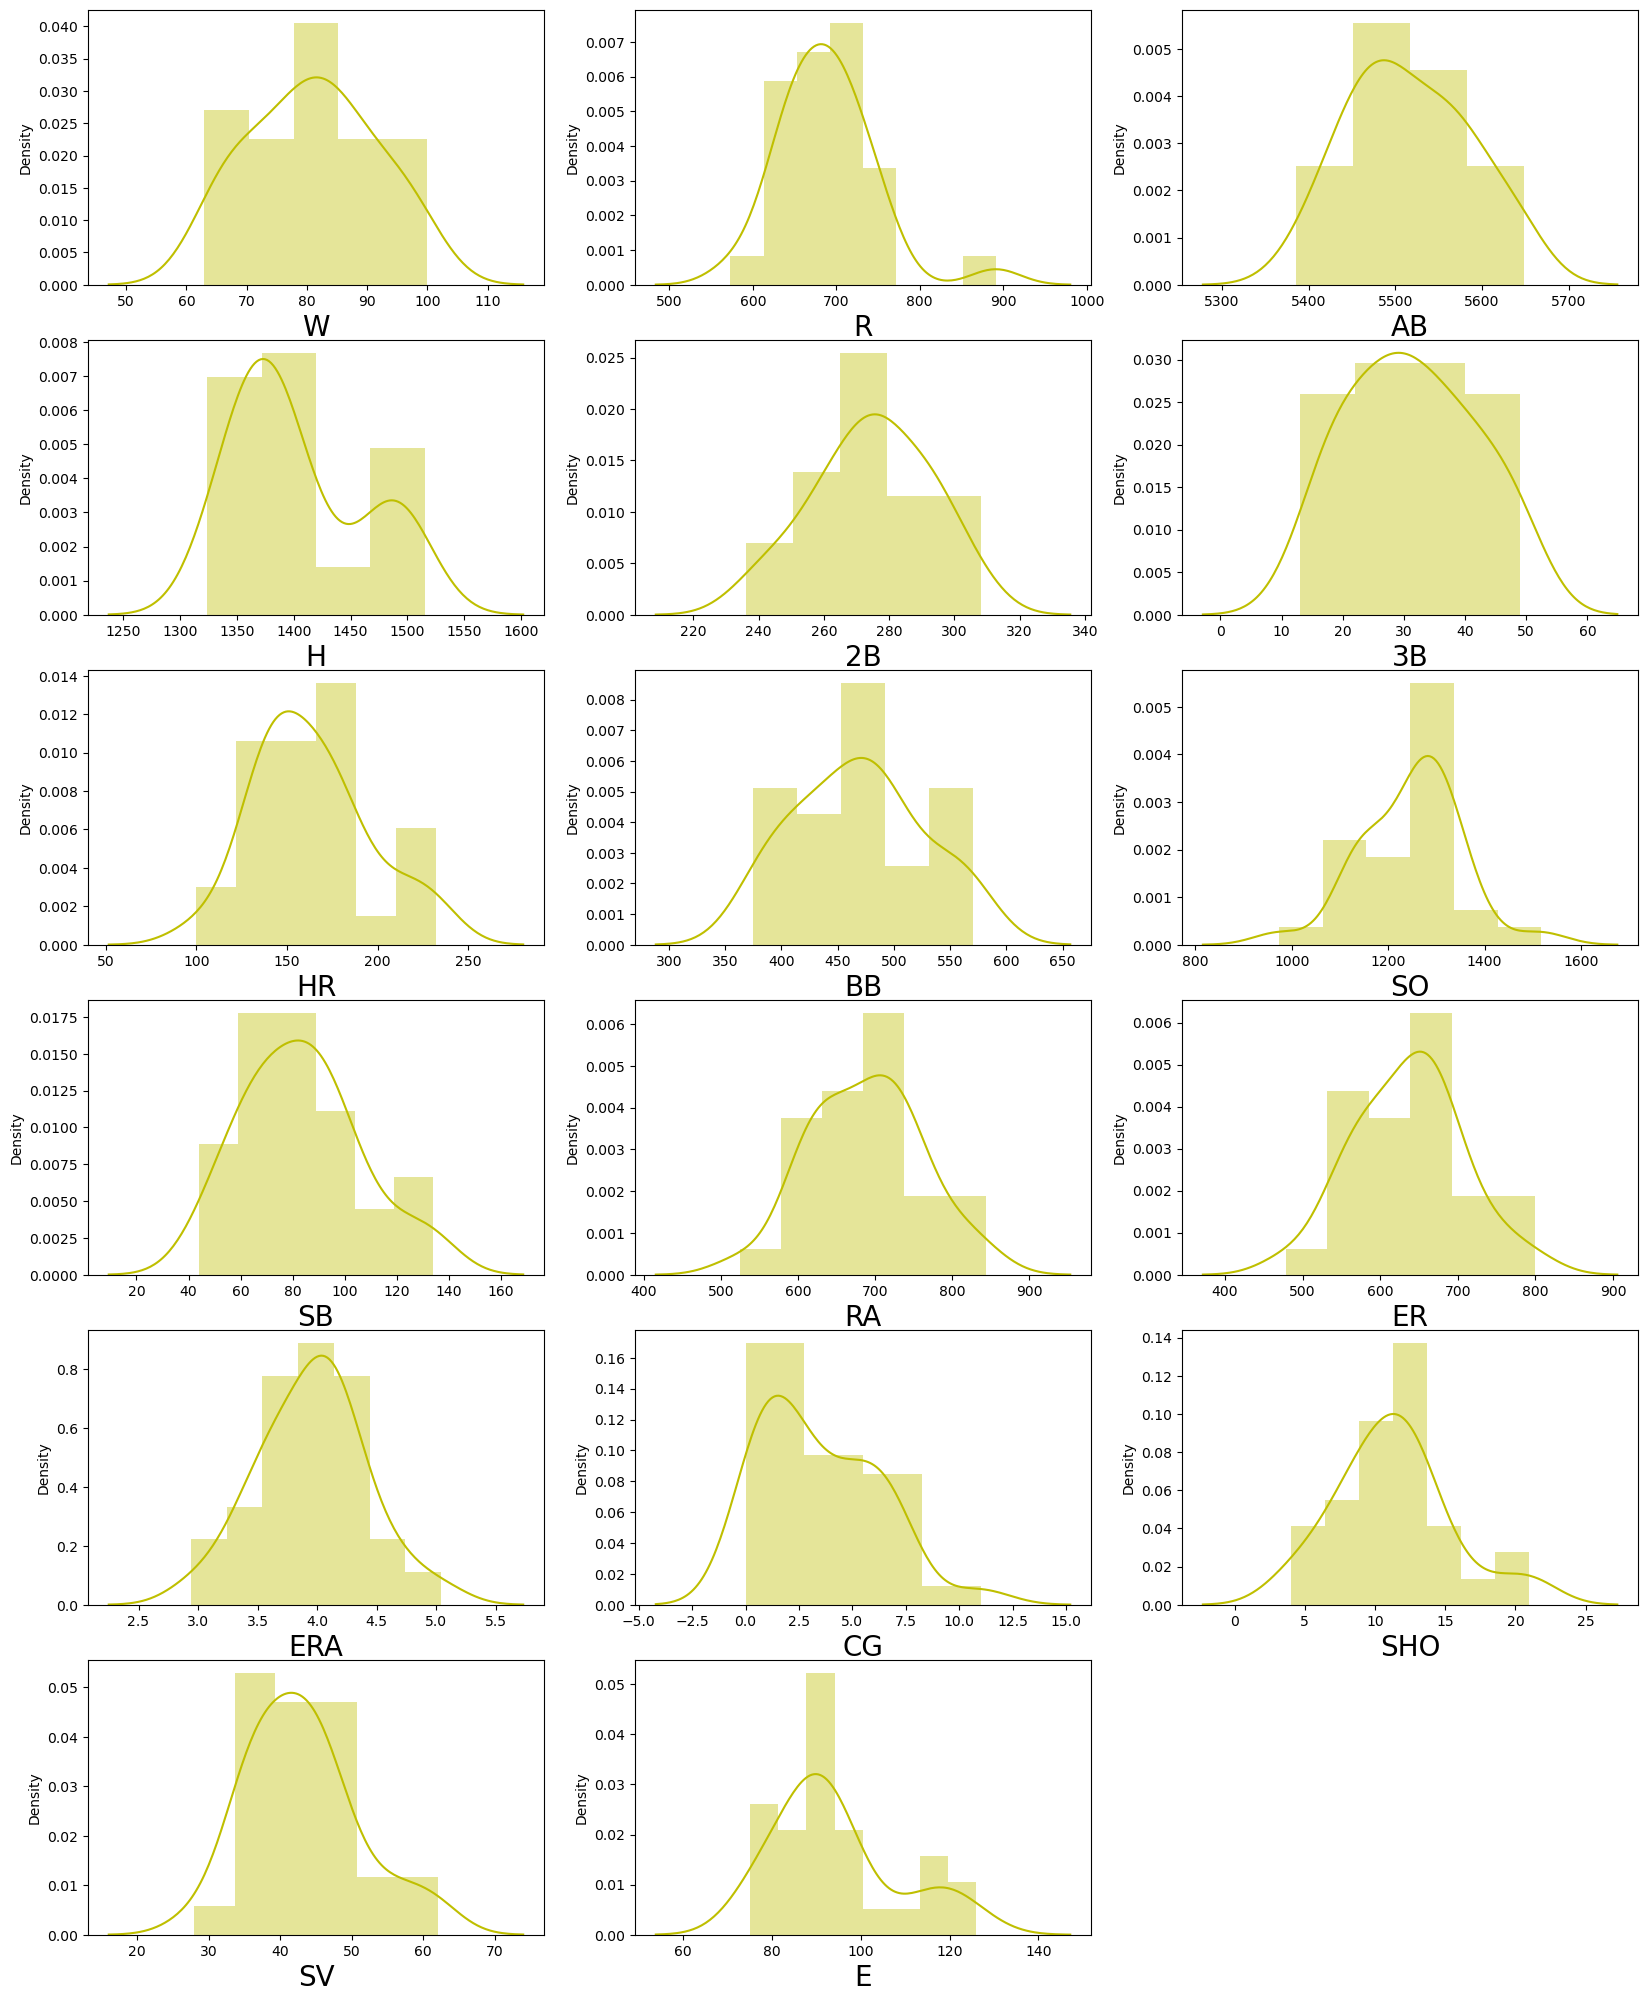

In [156]:
# After removing skewness,visualizing the data distribution in each column.
# Checking how the data has been distriubted in each column

features_skewed = ['SHO','SV','E']
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in df:
    if plotnumber<=18:
        ax = plt.subplot(6,3,plotnumber)
        sns.distplot(df[column],color='y')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

#### Data is normally distributed and the skewness is also removed.

# Preprocessing Pipeline

In [94]:
# Seperating dependent and independent variables
x = new_df.drop('W', axis=1)
y = new_df['W']
x.shape

(29, 14)

# Data Standardization

In [95]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns = x.columns)
x

,R,AB,2B,3B,HR,BB,SO,SB,RA,ER,ERA,SHO,SV,E
0,0.959398,0.830084,1.556538,1.010845,-0.765863,-1.536359,-2.727623,0.905953,-0.664514,-0.511148,-0.511388,-0.787002,1.532753,-0.348265
1,0.331147,-0.702831,0.201171,1.208917,-0.181389,-0.495021,0.121896,-0.585315,0.154638,0.232161,0.238952,0.236737,0.312020,-0.540820
2,-0.274666,-1.100253,1.733325,-0.276617,-0.697101,1.252941,-0.925866,0.116458,-0.678397,-0.754153,-0.643801,-0.252844,-0.664137,-1.326125
3,-1.329231,0.233951,-0.800621,-0.474688,-0.869006,-1.145857,-0.201246,-0.673037,0.168522,0.089217,0.040333,-0.513555,-0.820689,0.650818
4,0.174084,1.255894,0.908319,1.704094,-0.353293,-0.197495,0.072935,-0.015124,1.584683,1.561540,1.496876,0.236737,-1.149165,-0.540820
5,1.856900,0.716535,-0.093474,-1.266972,1.743939,1.643442,-0.240414,-0.892341,0.126870,0.217866,0.150677,-2.064039,0.677176,0.082858
6,0.712585,-0.447345,-1.625627,-1.167936,1.915843,-0.885522,0.777970,-1.725697,0.057451,0.132100,0.194815,-0.252844,0.052325,-1.588197
7,-0.835605,-0.447345,0.260100,0.020490,0.196801,-0.550807,0.572335,0.160319,-0.650630,-0.468265,-0.489319,0.236737,1.908137,0.237592
8,1.497899,1.752672,1.202964,0.119526,-0.009484,0.230197,-1.013995,-0.541454,0.890486,0.818231,0.768604,-0.252844,-0.365006,0.383386
9,1.565212,-0.078310,0.319029,0.020490,0.368705,0.695081,-0.181661,0.774370,0.612808,0.618110,0.614123,-0.513555,0.312020,1.554265


## Check for Multicolinearity:

In [96]:
# checking VIF (Variance Inflation factor)
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF values']= [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['Features'] = x.columns
vif

,VIF values,Features
0,6.219825,R
1,9.828077,AB
2,2.683572,2B
3,3.196853,3B
4,7.369072,HR
5,2.686472,BB
6,2.741072,SO
7,1.757901,SB
8,179.096825,RA
9,1754.643859,ER


In [97]:
x.drop('ER', axis =1, inplace=True)

In [98]:
# Again checking the VIF after removing one column
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif["Features"] = x.columns
vif


,VIF values,Features
0,4.352902,R
1,3.177214,AB
2,2.597985,2B
3,3.072775,3B
4,4.949255,HR
5,2.561982,BB
6,2.661842,SO
7,1.680467,SB
8,119.939744,RA
9,111.859162,ERA


In [99]:
x.drop('RA',axis=1,inplace=True)

In [100]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF values'] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['Features'] = x.columns
vif

,VIF values,Features
0,4.250076,R
1,2.238746,AB
2,2.597917,2B
3,3.030073,3B
4,4.562014,HR
5,2.222720,BB
6,2.042786,SO
7,1.568151,SB
8,3.878177,ERA
9,2.651314,SHO


#### Now, we can observe that VIF values of all columns are less than 10. Multicolinearity problem is solved.

# Building Machine Learning Models

In [101]:
from sklearn.model_selection import train_test_split as TTS
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [102]:
from sklearn.linear_model import LinearRegression
maxAcc = 0
maxRS = 0
for i in range(1,100):
    x_train,x_test,y_train,y_test = TTS(x,y,test_size=0.30,random_state=i)
    model = LinearRegression()
    model.fit(x_train,y_train)
    pred = model.predict(x_test)
    acc = r2_score(y_test,pred)
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
print("Maximum r2 score is ",maxAcc,"at random state ",maxRS)

Maximum r2 score is  0.9291790579976077 at random state  50


#### Getting maximum R2 scoreas 92% at random state 50

In [103]:
x_train,x_test,y_train,y_test = TTS(x,y,test_size=0.30,random_state=maxRS)

# Regression Algorithms

In [104]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.svm import SVR
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn import metrics

# Linear Regression

In [105]:
#checking r2 score for Linear Regression
LR = LinearRegression()
LR.fit(x_train,y_train)
predLR = LR.predict(x_test)
# R2_Score
print("R2_score:",r2_score(y_test,predLR))

# Mean Absolute Error (MAE)
print("MAE:",metrics.mean_absolute_error(y_test,predLR))

#Mean Squared Error (MSE)
print("MSE:",metrics.mean_squared_error(y_test,predLR))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test,predLR)))

R2_score: 0.9291790579976077
MAE: 2.4627865987898443
MSE: 10.163242343651952
RMSE: 3.187984056367276


#### The r2_score value of Linear Regression model is 92.91%.

# Ridge Regressor

In [106]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
paramsRidge = {'alpha':[0.01,0.1,1.0,10.26],'solver':['auto','svd','cholesky','lsqr','sparse_cg','sag','saga']}
ridge = Ridge()
clf = GridSearchCV(ridge,paramsRidge)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'alpha': 10.26, 'solver': 'sag'}


In [107]:
#checking r2 score for Ridge
ridge = Ridge(alpha=10.26,solver='sag')
ridge.fit(x_train,y_train)
ridge.score(x_train,y_train)
pred_ridge = ridge.predict(x_test)
# R2_Score
print("R2_score:",r2_score(y_test,pred_ridge))

# Mean Absolute Error (MAE)
print("MAE:",metrics.mean_absolute_error(y_test,pred_ridge))

#Mean Squared Error (MSE)
print("MSE:",metrics.mean_squared_error(y_test,pred_ridge))

# Root Mean Squared Error
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test,pred_ridge)))

R2_score: 0.8227128499105765
MAE: 4.38828900354664
MSE: 25.441800402956286
RMSE: 5.043986558562214


#### The r2_score of Ridge Regressor is 82%

# Lasso Regressor

In [108]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
parameters = {'alpha':[0.0001,0.001,0.01,0.1,1,10],'random_state':list(range(0,100))}
lasso = Lasso()
clf = GridSearchCV(lasso,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'alpha': 1, 'random_state': 0}


In [109]:
#checking r2 score for Lasso
lasso = Lasso(alpha=1,random_state=0)
lasso.fit(x_train,y_train)
lasso.score(x_train,y_train)
pred_lasso = lasso.predict(x_test)
# R2_Score
print("R2_score:",r2_score(y_test,pred_lasso))

# Mean Absolute Error (MAE)
print("MAE:",metrics.mean_absolute_error(y_test,pred_lasso))

#Mean Squared Error (MSE)
print("MSE:",metrics.mean_squared_error(y_test,pred_lasso))

# Root Mean Squared Error
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test,pred_lasso)))

R2_score: 0.8642951302468397
MAE: 3.8253497504300973
MSE: 19.4744864939597
RMSE: 4.41299065192299


#### The R2_score using Lasso Regressor is 86%.

# Stochastic Gradient Descent Regressor

In [110]:
#checking r2 score for Stochastic Gradient Descent Regressor
SGD = SGDRegressor()
SGD.fit(x_train,y_train)

predSGD=SGD.predict(x_test)
# R2_Score
print("R2_score:",r2_score(y_test,predSGD))

# Mean Absolute Error (MAE)
print("MAE:",metrics.mean_absolute_error(y_test,predSGD))

#Mean Squared Error (MSE)
print("MSE:",metrics.mean_squared_error(y_test,predSGD))

# Root Mean Squared Error
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test,predSGD)))

R2_score: 0.9289708673565708
MAE: 2.750365562149759
MSE: 10.193118985768168
RMSE: 3.192666438224978


#### The R2_score using SGDRegressor is 93%.

# Checking for Cross Validation Score

In [111]:
from sklearn.model_selection import cross_val_score

# Checking CV score for LinearRegression
print("CV score for LinearRegression:", cross_val_score(LR,x,y,cv=5).mean())

# Checking CV score for Ridge Regression
print("CV score for Ridge Regression:", cross_val_score(ridge,x,y,cv=5).mean())

# Checking CV score for Lasso Regression
print("CV score for Lasso Regression:",cross_val_score(lasso,x,y,cv=5).mean())

# Checking CV score for SGD Regression
print("CV score for SGD Regression:",cross_val_score(SGD,x,y,cv=5).mean())

CV score for LinearRegression: 0.37344412304899344
CV score for Ridge Regression: 0.3492521249893811
CV score for Lasso Regression: 0.5206537019436117
CV score for SGD Regression: 0.27177825921926235


#### From the difference of both R2_score and cross validation score, we can conclude that Lasso best fits the model.

# Hyperparameter Tuning

In [112]:
from sklearn.model_selection import GridSearchCV

# Lasso Regresssor

parameters = {'alpha':[0.01,0.1,1.0,10.26],
              'selection':['cyclic','random'],
              'max_iter':[2,4,6,8,10],
              'tol':[100,1000],
              'fit_intercept':['bool']}

GCV = GridSearchCV(Lasso(),parameters,cv=5)

GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.01, 0.1, 1.0, 10.26],
                         'fit_intercept': ['bool'],
                         'max_iter': [2, 4, 6, 8, 10],
                         'selection': ['cyclic', 'random'],
                         'tol': [100, 1000]})

In [113]:
GCV.best_params_

{'alpha': 1.0,
 'fit_intercept': 'bool',
 'max_iter': 4,
 'selection': 'random',
 'tol': 1000}

In [114]:
# Creating Final Model

baseball = Lasso(alpha=0.1,fit_intercept='bool',max_iter=10,selection='random',tol=1000)
baseball.fit(x_train,y_train)
pred = baseball.predict(x_test)
print('R2_score:',r2_score(y_test,pred_lasso)*100)
print("RMSE value:",np.sqrt(metrics.mean_squared_error(y_test,pred_lasso)))

R2_score: 86.42951302468397
RMSE value: 4.41299065192299


#### After HyperParameter tuning, the model's R2_score is 86.42% for the best model.

# Save the model

In [115]:
#saving the model 
import joblib
joblib.dump(baseball,'Baseball.pkl')


['Baseball.pkl']

In [116]:

loadmodel = joblib.load('Baseball.pkl')

# Prediction

In [117]:
import numpy as np
a = np.array(y_test)
predicted = np.array(loadmodel.predict(x_test))
df_final = pd.DataFrame({"Original":a,"Predicted":predicted},index=range(len(a)))
df_final

,Original,Predicted
0,68,63.940570
1,78,78.054414
2,74,76.546137
3,88,79.790816
4,68,73.000291
5,64,66.075442
6,92,89.694829
7,90,92.288979
8,100,102.395578


####  The above dataframe have original data with the predicted data from the best model.

### Prediction with Visualization

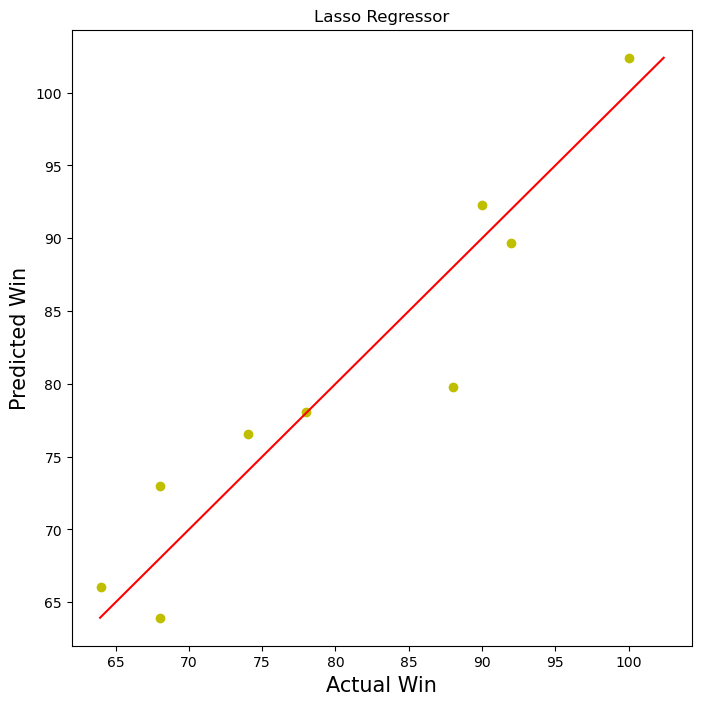

In [158]:
plt.figure(figsize=(8,8))
plt.scatter(y_test,predicted,c='y')
plt1 = max(max(predicted),max(y_test))
plt2 = min(min(predicted),min(y_test))
plt.plot([plt1,plt2],[plt1,plt2],'r-')
plt.xlabel('Actual Win',fontsize=15)
plt.ylabel('Predicted Win',fontsize=15)
plt.title("Lasso Regressor")
plt.show()

#### The red line represents the actual win and yellow dots represents the predicted win.